In [1]:
cd ..

/Users/ulfaslak/Dropbox/MSc/sem12/MScProject/Academic/code/pipeline_code


In [2]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn import gaussian_process

from scipy.stats import pearsonr

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set_style("ticks", {"xtick.direction": "in", "ytick.direction": "in"})  # <-- STYLE
import numpy as np
import pandas as pd
import json
from collections import Counter

from build_dataset.analysis.compute_thetas import compute_thetas

/Users/ulfaslak/miniconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [99]:
## General variables
TMPFIGPATH = "visualisation/figures/"
FIGPATH = "../../master_thesis/figures/"
tc = "tc1_spring"

## General dictionaries
with open('globals/feature_name_map.json') as infile:
    feature_name_map = json.load(infile)
with open('globals/super_traits.json') as infile:
    super_traits = json.load(infile)
with open('globals/trait_sign.json') as infile:
    trait_sign = json.load(infile)

## Load data
Xtz = np.loadtxt("data/Xtz_%s.csv" % tc, delimiter=",")
Y = np.loadtxt("data/Y.csv", delimiter=",")
M = np.loadtxt("data/M.csv", delimiter=",")

Xtz_clean_svm = np.loadtxt("data/Xtz_%s_clean_svm.csv" % tc, delimiter=",")
Xtz_clean_kd = np.loadtxt("data/Xtz_%s_clean_kd.csv" % tc, delimiter=",")

Y_clean_kd = np.loadtxt("data/Y_%s_clean_kd.csv" % tc, delimiter=",")
Y_clean_svm = np.loadtxt("data/Y_%s_clean_svm.csv" % tc, delimiter=",")
Q_clean_kd = np.loadtxt("data/Q_%s_clean_kd.csv" % tc, delimiter=",")
Q_clean_svm = np.loadtxt("data/Q_%s_clean_svm.csv" % tc, delimiter=",")
M_clean_kd = np.loadtxt("data/M_%s_clean_kd.csv" % tc, delimiter=",")
M_clean_svm = np.loadtxt("data/M_%s_clean_svm.csv" % tc, delimiter=",")
D_clean_kd = np.loadtxt("data/D_%s_clean_kd.csv" % tc, delimiter=",")
D_clean_svm = np.loadtxt("data/D_%s_clean_svm.csv" % tc, delimiter=",")

Xtz_clean_svm_valid_users = np.loadtxt("data/XtzYM_%s_clean_svm_valid_users.csv" % tc, delimiter=",")
Xtz_clean_kd_valid_users = np.loadtxt("data/XtzYM_%s_clean_kd_valid_users.csv" % tc, delimiter=",")

feat_names = np.load("data/X_2014_%s_feat_names_sorted.pickle" % None)
    
## General functions
def cl(f):
    return '_'.join(('_'.join(f.split("__allweek__allday__"))).split("__"))
def cp(f):
    return ' '.join([w.capitalize() for w in f.split('_')])

## Regression

In [4]:
t = -1
lm1 = LR().fit(Xtz_clean_svm, M_clean_svm[:, t])
lm2 = Lasso(alpha=0.001).fit(Xtz_clean_svm, M_clean_svm[:, t])
lm3 = Ridge(alpha=.01).fit(Xtz_clean_svm, M_clean_svm[:, t])
lm4 = BayesianRidge().fit(Xtz_clean_svm, M_clean_svm[:, t])
gp = gaussian_process.GaussianProcess(nugget=5, theta0=1e-2, thetaL=1e-4, thetaU=1e-1).fit(Xtz_clean_svm, M_clean_svm[:, t])

/Users/ulfaslak/miniconda/lib/python2.7/site-packages/scikit_learn-0.15.2-py2.7-macosx-10.5-x86_64.egg/sklearn/linear_model/base.py:400: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if precompute == 'auto':


In [5]:
print lm1.score(Xtz_clean_svm, M_clean_svm[:, t])
print lm2.score(Xtz_clean_svm, M_clean_svm[:, t])
print lm3.score(Xtz_clean_svm, M_clean_svm[:, t])
print lm4.score(Xtz_clean_svm, M_clean_svm[:, t])
print gp.score(Xtz_clean_svm, M_clean_svm[:, t])

0.187261491863
0.179668919833
0.187261491364
0.148467035416
0.187375943619


In [6]:
pd.options.display.max_columns = 100
sorted(zip(feat_names, lm2.coef_), key=lambda x: x[1], reverse=True)

[('interaction_autocorrelation_physical', 0.010244807425571859),
 ('percent_initiated_conversations_text_std', 0.0096331135460837967),
 ('duration_text', 0.0091578343127716871),
 ('ratio_interactions_campus_other_physical+stop', 0.0087310276167765679),
 ('percent_initiated_conversations_call_std', 0.0046177386364250868),
 ('percent_nocturnal_screen', 0.0037179952976176388),
 ('duration_stop', 0.0029181918286956886),
 ('response_delay_call_mean', 0.0028390566734035065),
 ('response_delay_text_std', 0.0026815370639893354),
 ('response_delay_text_mean', 0.0024626974834787599),
 ('duration_physical', 0.0017108362358345171),
 ('duration_screen', 0.0010516072268137602),
 ('number_of_contacts_stop', 0.0005683179929224406),
 ('ratio_social_screen_alone_screen_physical+screen', -0.0),
 ('percent_initiated_conversations_call_mean', -0.0),
 ('response_rate_text+call_mean', 0.0),
 ('first_seen_response_rate_text+screen', 0.0),
 ('overlap_conversations_physical', 0.0),
 ('percent_outside_campus_fro

In [7]:
pd.DataFrame(np.corrcoef(Y_clean_svm.T))

,0,1,2,3,4
0,1.000000,0.062622,0.281358,0.137568,-0.154962
1,0.062622,1.000000,0.057414,0.169517,-0.072599
2,0.281358,0.057414,1.000000,0.271257,-0.304993
3,0.137568,0.169517,0.271257,1.000000,-0.229469
4,-0.154962,-0.072599,-0.304993,-0.229469,1.000000


In [8]:
print np.mean(Y_clean_svm, axis=0)
print np.mean(Y_clean_kd, axis=0)

[ 2.54839506  2.37308642  2.49845679  2.79698217  1.32416226]
[ 2.54634146  2.37560976  2.49939024  2.79322493  1.33275261]


percent_initiated_conversations_text_mean


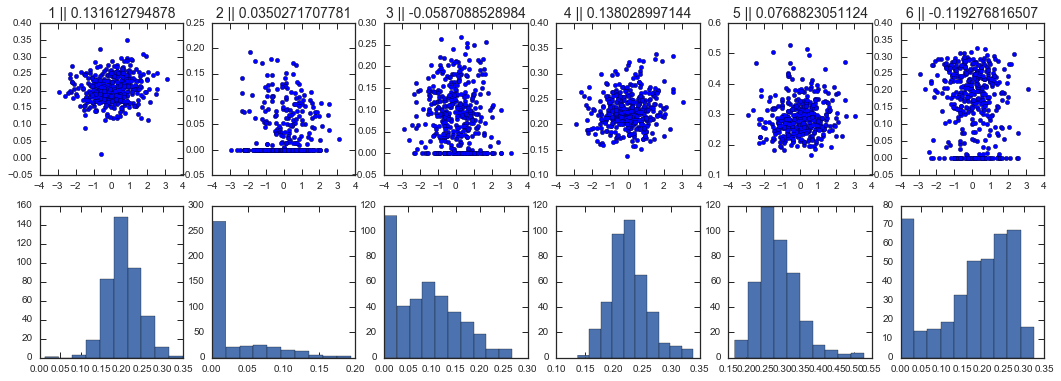

In [9]:
c = 10
print feat_names[c]
plt.figure(figsize=(18,6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.title('123456'[i] + " || " + str(pearsonr(Xtz_clean_svm[:, c], M_clean_svm[:, i])[0]), fontsize=14)
    plt.scatter(Xtz_clean_svm[:, c], M_clean_svm[:, i])
for i in range(6):
    plt.subplot(2, 6, i+7)
    plt.hist(M_clean_svm[:, i], bins=10)
plt.show()

## Archetype stories

In [10]:
def col_shuf(arr):
    arr = arr.copy()
    for i in range(arr.shape[1]):
        np.random.shuffle(arr[:, i])
    return arr

def multiply_comparisons_p_value(p_arr):
    return 1 - np.prod([1 - p for p in p_arr])

In [28]:
def correlation_matrix(X, Y, M, label_names, label, vis=False):
    
    X_s = col_shuf(X)
    
    if label=="Y": T = Y
    if label=="M": T = M
    
    _, dim1_x = X.shape
    _, dim1_t = T.shape

    C = np.empty((dim1_x, dim1_t))
    P = np.empty((dim1_x, dim1_t))
    for i in range(dim1_x):
        for j in range(dim1_t):
            C[i, j], P[i, j] = pearsonr(X[:, i], T[:, j])

    if label=="Y":
        Ps = []
        for _ in range(100):
            Y_s = col_shuf(Y)
            for i in range(X.shape[1]):
                for j in range(Y.shape[1]):
                    Ps.append(pearsonr(X_s[:, i], Y_s[:, j])[1])
                    
    if label=="M":
        Ps = []
        Parcs_s = []
        for _ in range(1000):
            M_s = col_shuf(M)
            M_s = compute_thetas(Y, shuffle_arcs=True)
            for i in range(X.shape[1]):
                for j in range(M.shape[1]):
                    Ps.append(pearsonr(X_s[:, i], M_s[:, j])[1])
                    Parcs_s.append(pearsonr(X[:, i], M_s[:, j])[1])

    def plotit():
        plt.figure(figsize=(12, 18.5))
        sns.heatmap(C, annot=False, yticklabels=label_names)
        plt.yticks(fontsize=16)
        plt.tight_layout()
        plt.show()
        #plt.savefig(TMPFIGPATH+"X_%s_correlation.pdf" % label)
        
        plt.figure(figsize=(8,6))
        plt.title("Comparison with broken correlation", fontsize=16)
        plt.hist(np.log(Ps), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Shuffled", color="r", normed=True)
        plt.hist(np.log(P.reshape((1, -1))[0]), alpha=0.3, bins=np.arange(-10, 0.5, 0.5), label="Original", normed=True)
        plt.xlabel("$\log_e{p}$-value", fontsize=16)
        plt.ylabel("Bin freq.", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend(fontsize=16)
        plt.tight_layout()
        plt.show()
        #plt.savefig(TMPFIGPATH+"X_%s_p_values_histogram.pdf" % label)
    
    if vis:
        plotit()
    
    if label=="Y":
        return C, P, Ps
    if label=="M":
        return C, P, Ps, Parcs_s

In [43]:
C1, P1, Ps1 = correlation_matrix(Xtz_clean_kd, Y_clean_kd, M_clean_kd, [feature_name_map[n] for n in feat_names], label="Y", vis=False)
C2, P2, Ps2, Parcs_s2 = correlation_matrix(Xtz_clean_kd, Y_clean_kd, M_clean_kd, [feature_name_map[n] for n in feat_names], label="M", vis=False)

### Point out non-non-linearity in archetype correlation

In [30]:
def regr_ocean(v, C):
    C = (C / np.mean(C, axis=0) - 1)
    return np.dot(C, v)
def regr_bfarcs(v, C):
    C = (C / np.mean(C, axis=0) - 1)
    return np.dot(C, v)

In [44]:
x, y = np.empty((38, 0)), np.empty((38, 0))
for u in range(Xtz_clean_kd.shape[0]):
    x = np.hstack([x, regr_ocean(Y_clean_kd[u], C1).reshape((-1, 1))])
    y = np.hstack([y, regr_bfarcs(M_clean_kd[u], C2).reshape((-1, 1))])

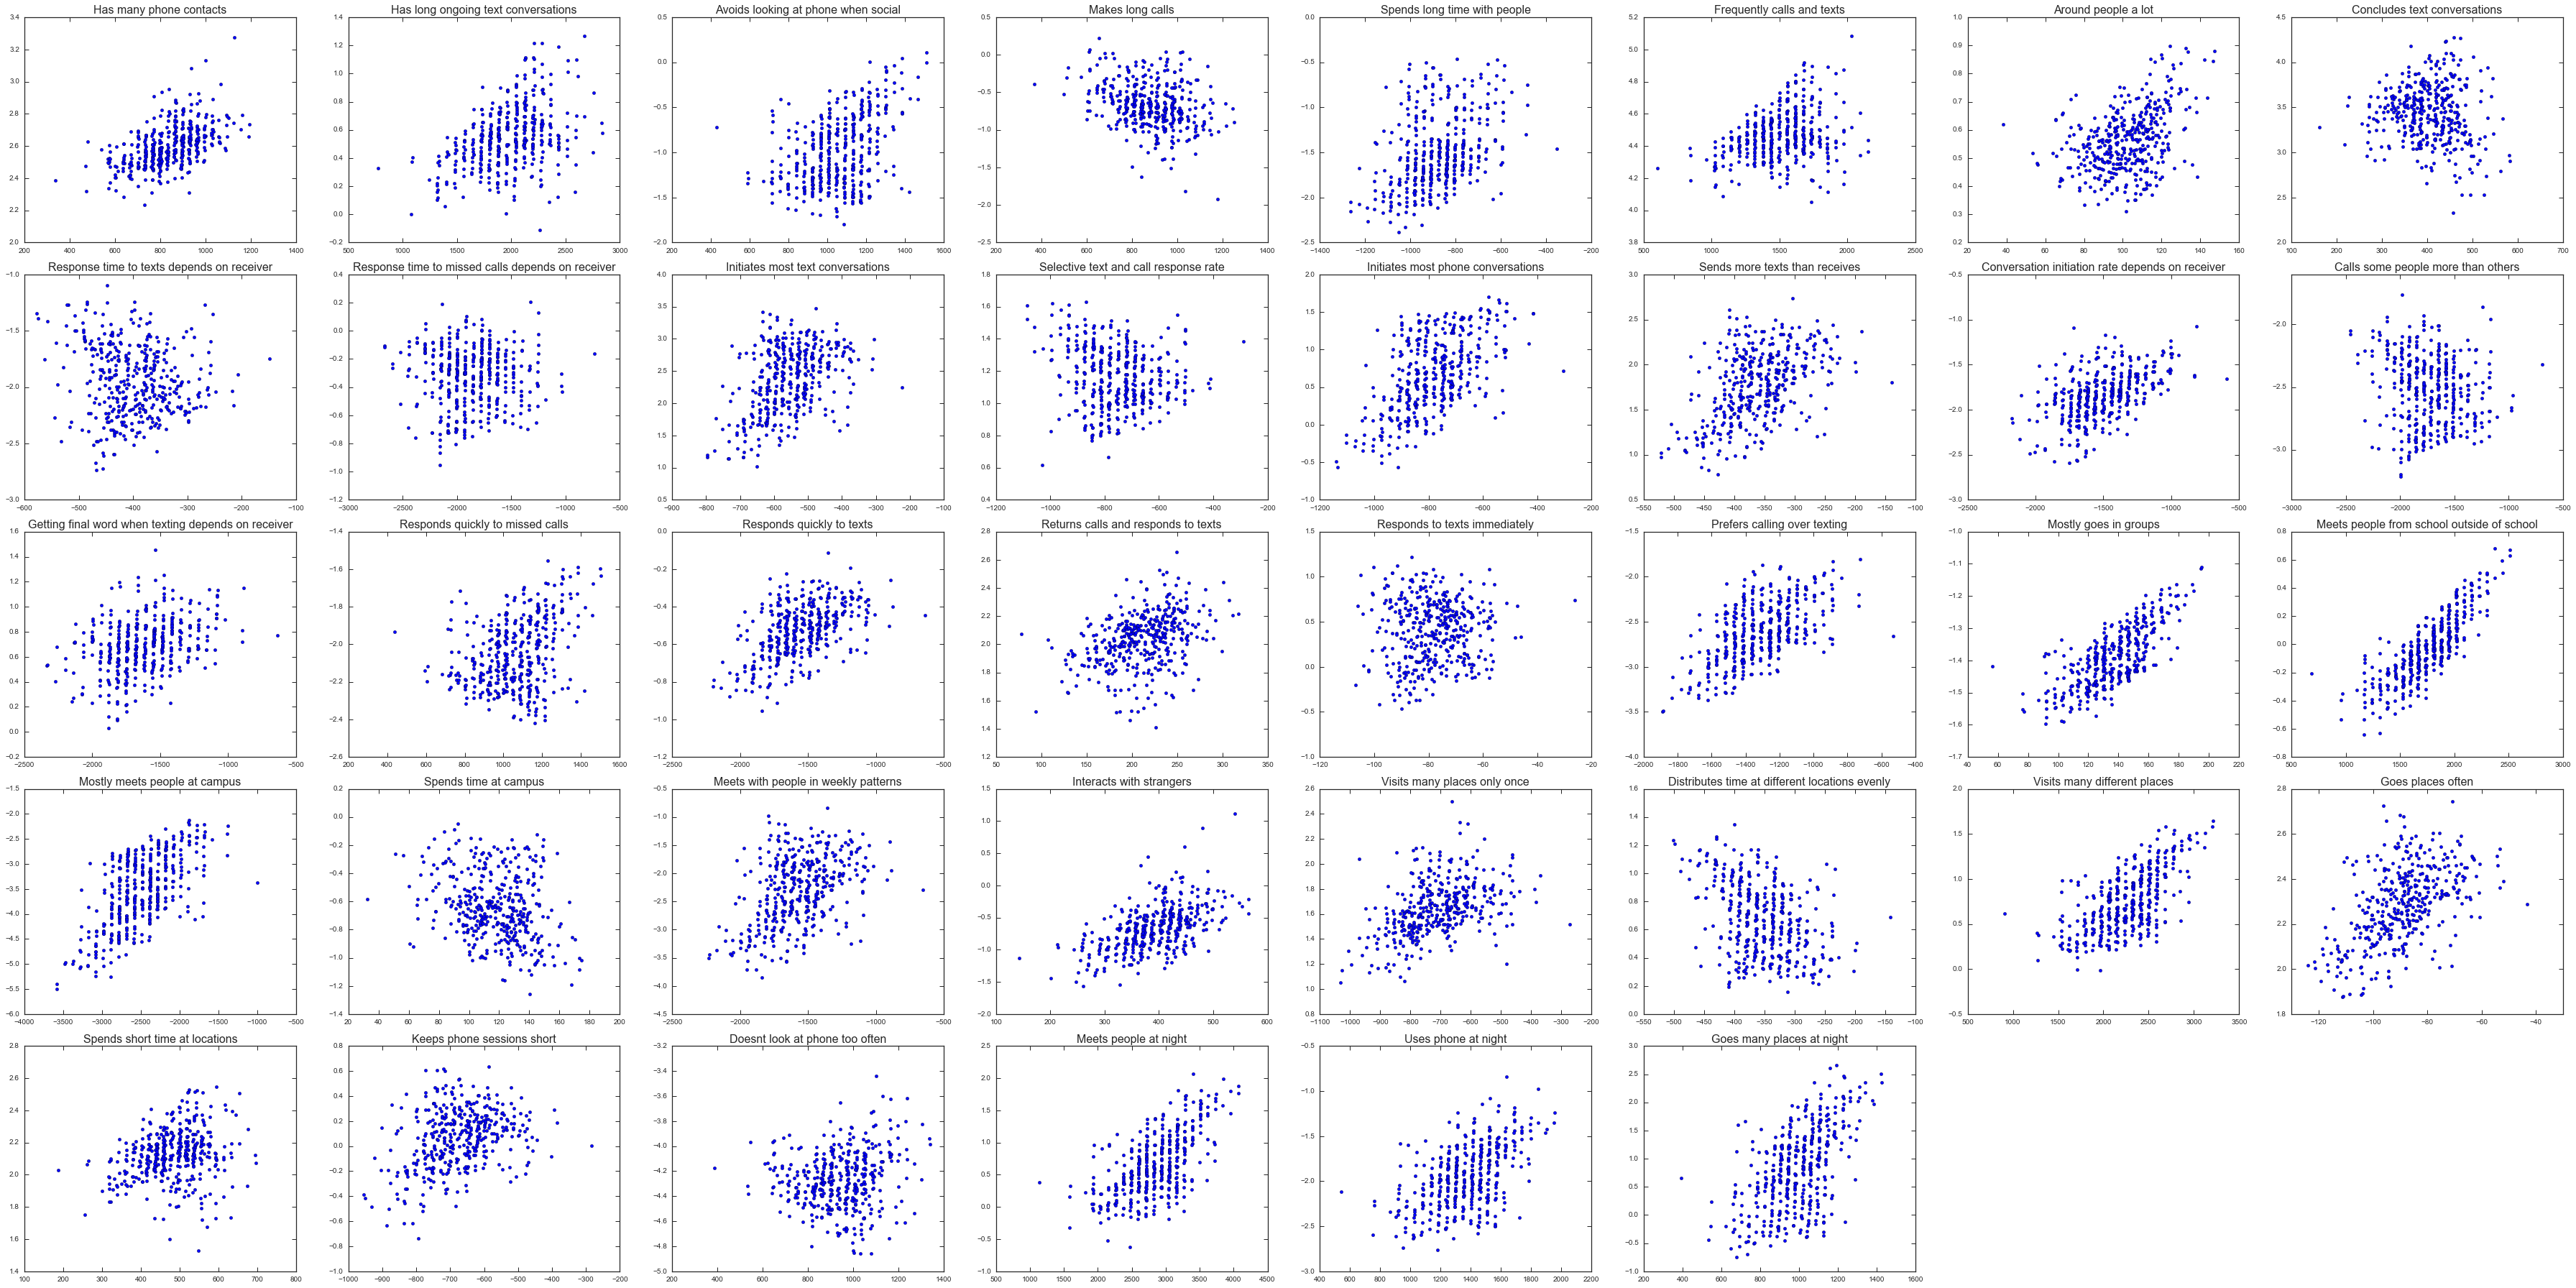

In [45]:
plt.figure(figsize=(50, 25))
for i in range(len(x)):
    plt.subplot(5, 8, i+1)
    plt.title(feature_name_map[feat_names[i]], fontsize=16)
    plt.scatter(x[i, :], y[i, :])
plt.tight_layout()
plt.savefig(TMPFIGPATH + "regression_correlations.png")

In [40]:
def interaction_matrix(X):
    I = np.empty((X.shape[0], 0))
    for i in range(X.shape[1]):
        for j in range(X.shape[1]):
            if j < i:
                continue
            I = np.hstack([I, (X[:, i] * X[:, j]).reshape((-1, 1))])
    return I

In [41]:
#pd.DataFrame(interaction_matrix(M_clean_kd))

    Build regression models between Y (big five) values and M (archetype resemblance) values towards each of the 38 behavioral indicators. Show that they do not regress towards the same values exactly. Explain why this may be.

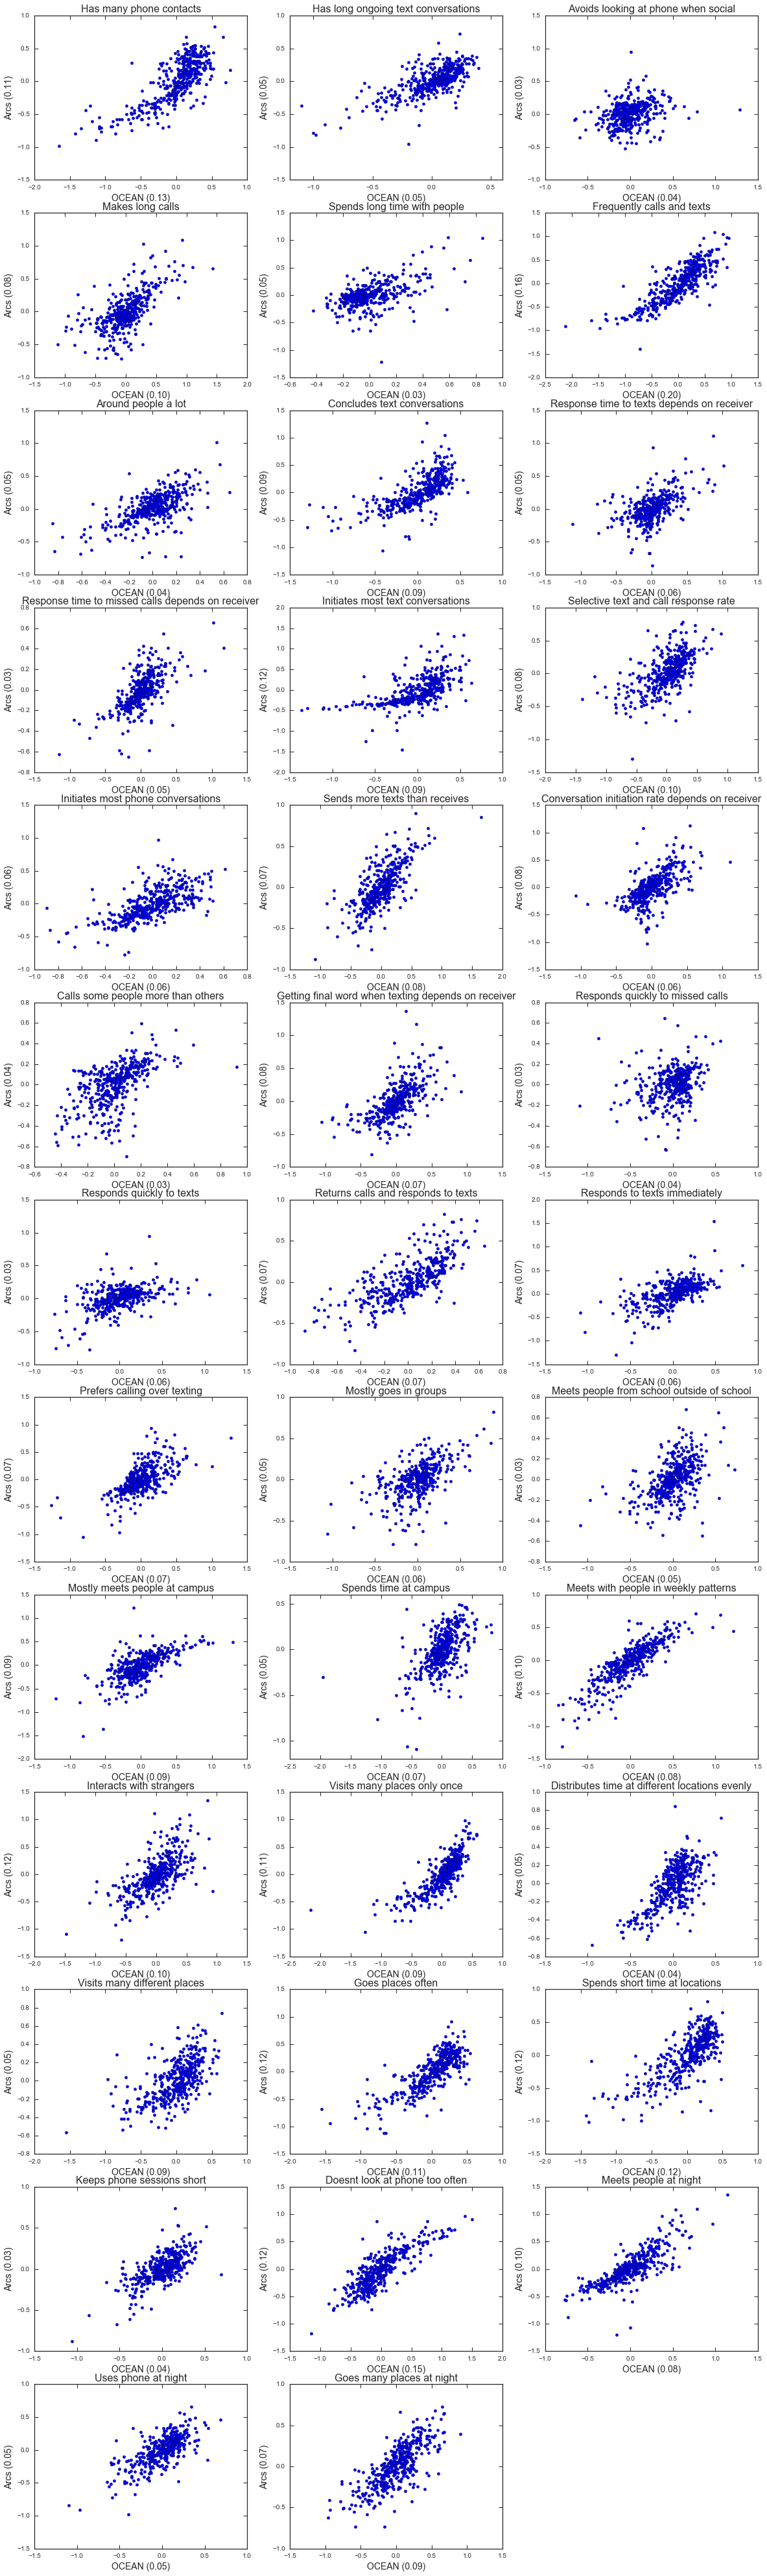

In [47]:
Y_interactions = np.hstack([Y_clean_kd, interaction_matrix(Y_clean_kd)])
M_interactions = np.hstack([M_clean_kd, interaction_matrix(M_clean_kd)])

plt.figure(figsize=(20, 70))
for i in range(len(x)):
    plt.subplot(13, 3, i+1)
    plt.title(feature_name_map[feat_names[i]], fontsize=16)
    lm1 = LR().fit(Y_interactions, Xtz_clean_kd[:, i])
    lm2 = LR().fit(M_interactions, Xtz_clean_kd[:, i])
    plt.scatter(lm1.predict(Y_interactions), lm2.predict(M_interactions))
    plt.xlabel("OCEAN (%.02f)" % lm1.score(Y_interactions, Xtz_clean_kd[:, i]), fontsize=14)
    plt.ylabel("Arcs (%.02f)" % lm2.score(M_interactions, Xtz_clean_kd[:, i]), fontsize=14)
plt.show()

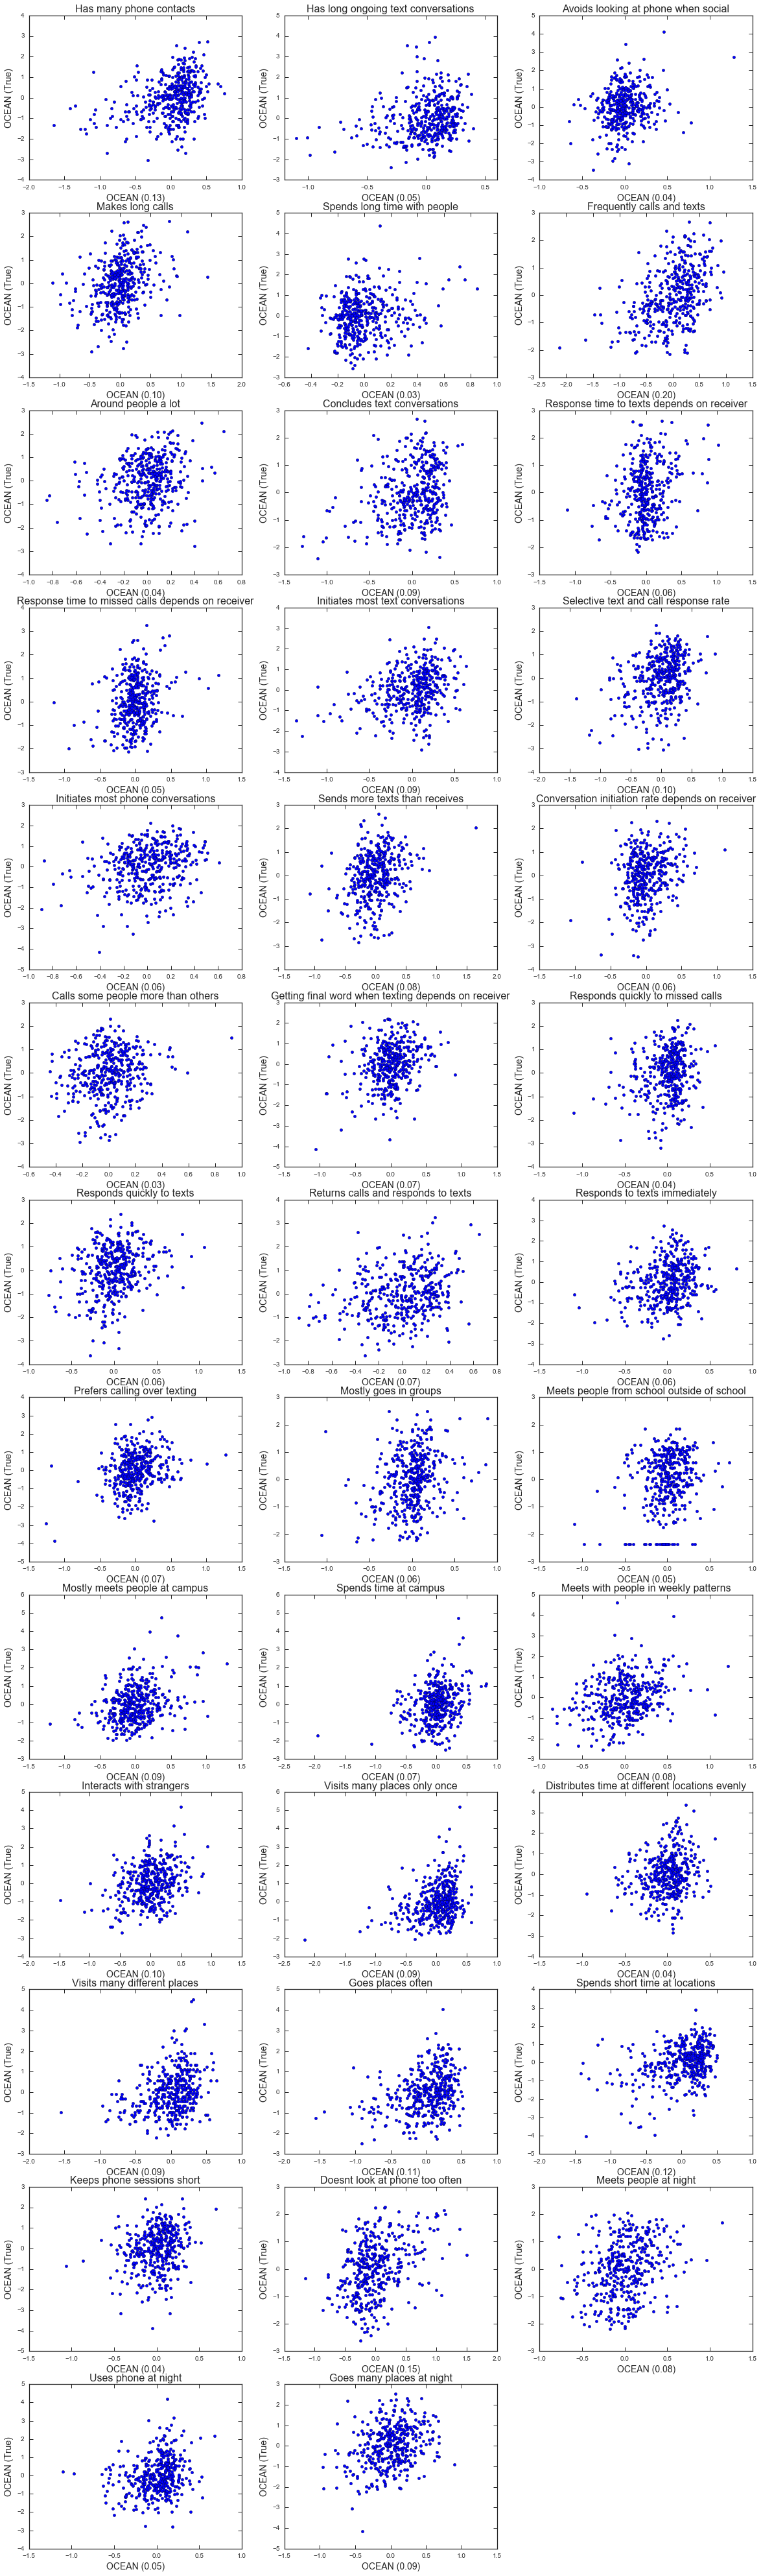

In [87]:
Y_interactions = np.hstack([Y_clean_kd, interaction_matrix(Y_clean_kd)])

plt.figure(figsize=(20, 70))
for i in range(len(x)):
    plt.subplot(13, 3, i+1)
    plt.title(feature_name_map[feat_names[i]], fontsize=16)
    lm1 = LR().fit(Y_interactions, Xtz_clean_kd[:, i])
    plt.scatter(lm1.predict(Y_interactions), Xtz_clean_kd[:, i])
    plt.xlabel("OCEAN (%.02f)" % lm1.score(Y_interactions, Xtz_clean_kd[:, i]), fontsize=14)
    plt.ylabel("OCEAN (True)", fontsize=14)
plt.show()

    Show which behavioral indicators correlate significantly with which traits and archetypes

In [ ]:
overlap_counter = Counter()

sigfeats = []

traits = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
truefalse = ["", "True", "False"]

for tra in range(5):
    index_mask = []
    sorted_indices, sorted_p_values = zip(*sorted(enumerate(P[:, tra]), key=lambda x: x[1]))
    for e, (i, p) in enumerate(zip(sorted_indices, sorted_p_values)):
        if p <= 0.05 / P.shape[0] * i:
            index_mask[:e+1] = sorted_indices[:e+1]
            
    p_values = P[index_mask, artrac]

    dat = []
    for e, i in enumerate(index_mask):
        dat.append(
            (feature_name_map[feat_names[i]] + " (%s)" % truefalse[int(np.sign(C2[i, tra]))], p_values[e])
        )

    dat = sorted(dat, key=lambda v: v[1])
    print tra, ":", traits[tra], "(MC p-value: %.04f)" % multiply_comparisons_p_value(p_values), " " * (39 - len(traits[tra])), "    p-values  Mult.Co."

    for i, d in enumerate(dat):
        print " " * 3, "-", d[0], " " * (58 - len(d[0])), "|   (%.04f)" % d[1], " (%.04f)" % multiply_comparisons_p_value(sorted(p_values)[:i+1])
        overlap_counter.update([d[0]])
    print
    
overlap = np.mean(overlap_counter.values())
#product = np.sum([np.prod(P[i, :]) for i in range(P.shape[0])])

In [17]:
C, P, Ps, Parcs_s = correlation_matrix(Xtz_clean_svm, Y_clean_svm, M_clean_svm, [feature_name_map[n] for n in feat_names], label="M", vis=False)

In [94]:
def data_stories(P, C):
    overlap_counter = Counter()

    sigfeats = []

    arc_profiles = ["Achiever", "Host", "Wildcard", "Loyalist", "Hippie", "Follower"]
    tra_profiles = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    truefalse = ["", "True", "False"]

    profiles = [p for p in [arc_profiles, tra_profiles] if len(p) == P.shape[1]][0]

    for col in range(P.shape[1]):
        index_mask = []
        sorted_indices, sorted_p_values = zip(*sorted(enumerate(P[:, col]), key=lambda x: x[1]))
        for e, (i, p) in enumerate(zip(sorted_indices, sorted_p_values)):
            if p <= 0.05 / P.shape[0] * i:
                index_mask[:e+1] = sorted_indices[:e+1]

        p_values = P[index_mask, col]
        correlat = C[index_mask, col]
        dat = []
        for e, i in enumerate(index_mask):
            dat.append(
                (feature_name_map[feat_names[i]] + " (%s)" % truefalse[int(np.sign(C2[i, col]))], p_values[e])
            )

        dat = sorted(dat, key=lambda v: v[1])
        print col, ":", profiles[col], "(MC p-value: %.04f)" % multiply_comparisons_p_value(p_values), " " * (39 - len(profiles[col])), "    p-values  Mult.Co.  co.coef."

        for i, d in enumerate(dat):
            print " " * 3, "-", d[0], " " * (58 - len(d[0])), "|   (%.04f)" % d[1], " (%.04f)" % multiply_comparisons_p_value(sorted(p_values)[:i+1]), " (%.04f)" % correlat[i]
            overlap_counter.update([d[0]])
        print

    return np.mean(overlap_counter.values())

data_stories(P1, C1)

0 : Openness (MC p-value: 0.0011)                                     p-values  Mult.Co.  co.coef.
    - Meets with people in weekly patterns (True)                 |   (0.0011)  (0.0011)  (-0.1609)

1 : Conscientiousness (MC p-value: 0.1451)                            p-values  Mult.Co.  co.coef.
    - Makes long calls (True)                                     |   (0.0002)  (0.0002)  (0.1827)
    - Interacts with strangers (False)                            |   (0.0017)  (0.0019)  (-0.1544)
    - Sends more texts than receives (True)                       |   (0.0025)  (0.0044)  (0.1491)
    - Responds to texts immediately (False)                       |   (0.0104)  (0.0148)  (0.1264)
    - Concludes text conversations (True)                         |   (0.0123)  (0.0269)  (0.1235)
    - Returns calls and responds to texts (True)                  |   (0.0133)  (0.0398)  (0.1222)
    - Avoids looking at phone when social (True)                  |   (0.0217)  (0.0607)  (0.1133)
    - M

1.1153846153846154

    Show that there is less overlap of correlating indicators with resemblance to AA inferred archetyped than for resemblance to random points in Big Five space. Report a p-value.

In [47]:
i_overlap = []

for i in range(1000):
    overlap_counter = Counter()
    PS = np.array(Parcs_s[228*i:228*(i+1)]).reshape((38, 6))

    sigfeats = []

    profiles = ["Achiever", "Host", "Wildcard", "Loyalist", "Hippie", "Follower"]
    truefalse = ["", "True", "False"]

    for arc in range(6):
        p_value_mask = []
        sorted_indices, sorted_p_values = zip(*sorted(enumerate(PS[:, arc]), key=lambda x: x[1]))
        for e, (i, p) in enumerate(zip(sorted_indices, sorted_p_values)):
            if p <= 0.05 / PS.shape[0] * i:
                p_value_mask[:e+1] = sorted_indices[:e+1]

        p_values = PS[p_value_mask, arc]

        dat = []
        for index, i in enumerate([list(PS[:, arc]).index(p) for p in p_values]):
            dat.append(
                (feature_name_map[feat_names[i]] + " (%s)" % truefalse[int(np.sign(C2[i, arc]))], p_values[index])
            )

        dat = sorted(dat, key=lambda v: v[1])
        for i, d in enumerate(dat):
            overlap_counter.update([d[0]])
            
    i_overlap.append(np.mean(overlap_counter.values()))

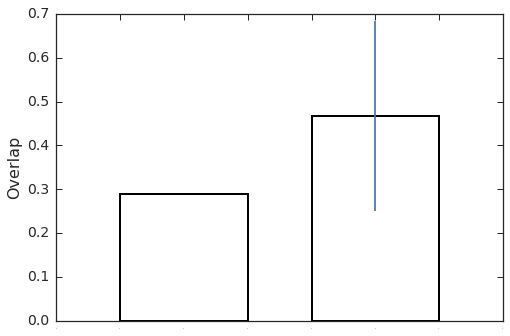

In [48]:
plt.figure()
plt.bar([0.1, 0.4], [overlap-1, np.mean(i_overlap)-1], yerr=[0, np.std(np.array(i_overlap)-1)], width=0.2, color="w", edgecolor="k", linewidth="2")
plt.xlim([0, 0.7])
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)
plt.ylabel("Overlap", fontsize=16)
plt.savefig(TMPFIGPATH + "overlap.pdf")

# Predicted X

In [81]:
Y_interactions = np.hstack([Y_clean_kd, interaction_matrix(Y_clean_kd)])
M_interactions = np.hstack([M_clean_kd, interaction_matrix(M_clean_kd)])

X_pred_OCEAN = np.empty(Xtz_clean_kd.shape)
X_pred_arche = np.empty(Xtz_clean_kd.shape)

for i in range(len(x)):
    lm1 = LR().fit(Y_interactions, Xtz_clean_kd[:, i])
    lm2 = LR().fit(M_interactions, Xtz_clean_kd[:, i])
    X_pred_OCEAN[:, i] = lm1.predict(Y_interactions)
    X_pred_arche[:, i] = lm2.predict(M_interactions)

In [97]:
C3, P3, _, _ = correlation_matrix(X_pred_OCEAN, Y_clean_kd, M_clean_kd, [feature_name_map[n] for n in feat_names], label="M", vis=False)
data_stories(P3, C3)

0 : Achiever (MC p-value: 0.0125)                                     p-values  Mult.Co.  co.coef.
    - Initiates most phone conversations (True)                   |   (0.0000)  (0.0000)  (0.4443)
    - Sends more texts than receives (True)                       |   (0.0000)  (0.0000)  (0.3973)
    - Uses phone at night (False)                                 |   (0.0000)  (0.0000)  (-0.3758)
    - Concludes text conversations (True)                         |   (0.0000)  (0.0000)  (0.3408)
    - Initiates most text conversations (True)                    |   (0.0000)  (0.0000)  (0.3223)
    - Interacts with strangers (False)                            |   (0.0000)  (0.0000)  (-0.3086)
    - Goes places often (True)                                    |   (0.0000)  (0.0000)  (0.2846)
    - Spends long time with people (True)                         |   (0.0000)  (0.0000)  (0.2832)
    - Mostly meets people at campus (True)                        |   (0.0000)  (0.0000)  (0.2717)
    - Se

2.0921052631578947

    Visualise enrichment. Show whether there is reason to postulate that certain indicators increase or decrease their value for subjects who are closer to specific archetypes.

Expl. var. pca: 0.294979181972
Expl. var. arc: 0.914158212797


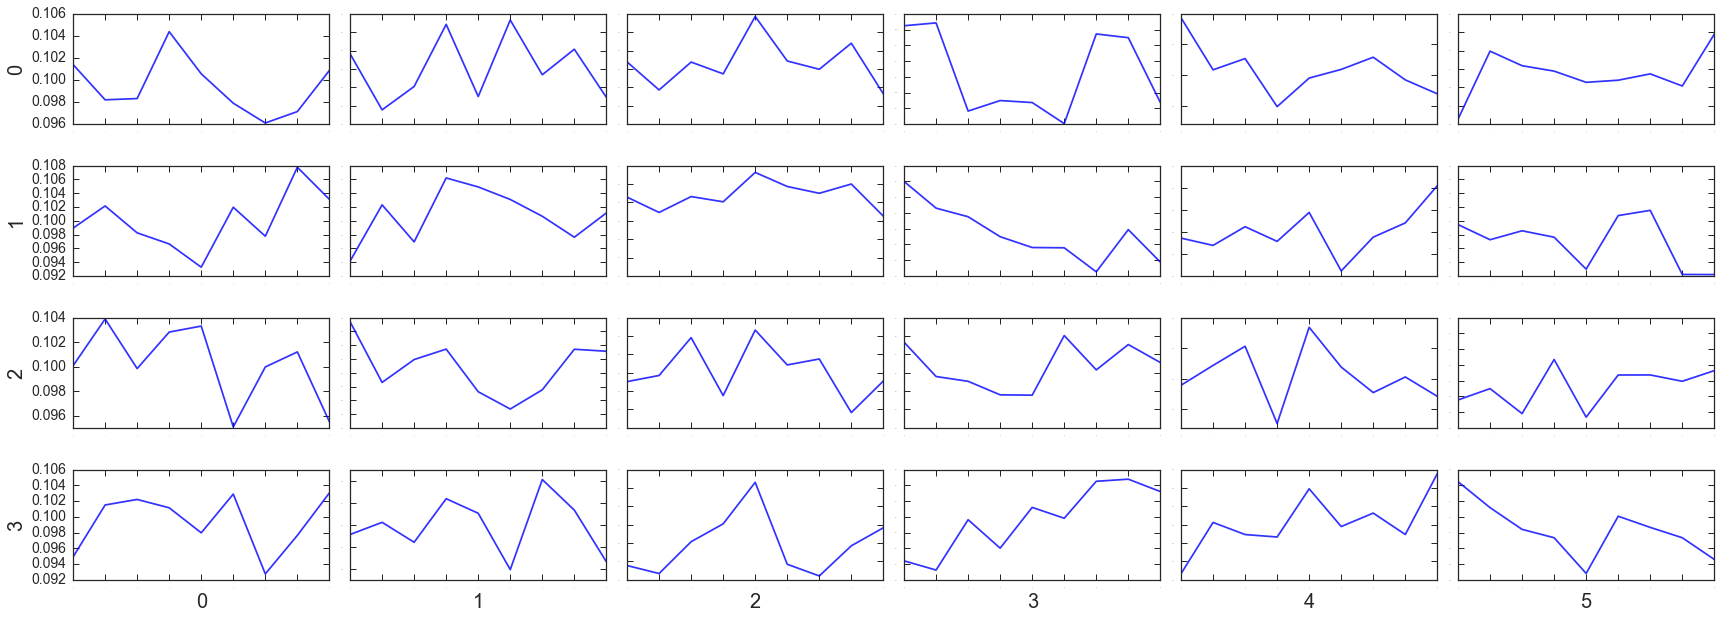

In [168]:
import numpy as np
from py_pcha.PCHA import PCHA
from sklearn.decomposition import PCA
from collections import defaultdict
from itertools import izip_longest

def enrichment(X, Y, noc, dim=None, nbins=10, vis=False, archetypes=None):

    def distance(a, b):
        return np.sqrt(np.sum(a*b))
    
    def prob(p_distr, val):
        try:
            return min(filter(lambda v: v[1] > val, p_distr), key=lambda v: v[1])[0]
        except ValueError:
            return max(p_distr, key=lambda v: v[1])[0]
    
    N, Mx = X.shape
    _, My = Y.shape
    
    if dim is None:
        dim = noc - 1
    
    if archetypes is None:
        # Fit PCA and PCHA on transformed
        pca = PCA(n_components=dim)
        Xpc = pca.fit_transform(X)
        A, C, _, _, varexpl = PCHA(Xpc.T, noc)

        A = A.T.A
        C = C.T.A

        print "Expl. var. pca:", sum(pca.explained_variance_ratio_)
        print "Expl. var. arc:", varexpl
    
    E = np.empty((noc, nbins, My))
    for l in range(noc):
        for k in range(My):
            c = map(lambda x: x[0], sorted(zip(Y[:, k], C[:, l]), key=lambda x: x[1], reverse=True))
            
            tmp = plt.figure()
            p_distr = plt.hist(Y[:, k], bins=10); plt.close(tmp)
            p_distr = zip(p_distr[0]/sum(p_distr[0]), p_distr[1])
            
            bb_prev = 0
            for b, bb in enumerate(map(int, np.linspace(0, 1, nbins+1)*300)[1:]):
                vals = c[bb_prev: bb]
                enr = np.mean(vals)
                
                E[l, b, k] = enr
                
                bb_prev = bb
                
    if vis:
        plt.figure(figsize=(4*My, 20*noc))
        c = 1
        for a in range(noc):
            for k in range(My):
                plt.subplot(Mx, My, c)
                plt.plot(range(nbins), E[a, :, k]/np.sum(E[a, :, k]), color="b", alpha=0.8)
                plt.xticks(fontsize=0)
                plt.yticks(fontsize=0)
                plt.xlim([0, 8])
                
                if k == 0:
                    plt.ylabel(a, fontsize=20)
                    plt.yticks(fontsize=14)
                if a == noc-1:
                    plt.xlabel(k, fontsize=20)
                
                c += 1
        plt.tight_layout()
        plt.savefig(TMPFIGPATH + "enrichments.pdf")
    
    return E, pca.inverse_transform(A)
        
E, arcs_orig = enrichment(Xtz_clean_svm, M_clean_svm, noc=4, nbins=10, vis=True)

In [64]:
pd.DataFrame(np.corrcoef(Y_clean_kd.T))

,0,1,2,3,4
0,1.000000,0.044038,0.335374,0.150097,-0.086261
1,0.044038,1.000000,0.150922,0.246357,-0.037279
2,0.335374,0.150922,1.000000,0.249623,-0.228652
3,0.150097,0.246357,0.249623,1.000000,-0.191773
4,-0.086261,-0.037279,-0.228652,-0.191773,1.000000


In [66]:
pd.DataFrame(arcs_orig.T)

,0,1,2,3
0,-1.384981,1.311812,1.315751,-1.139498
1,-1.590192,-0.915701,0.761313,1.149309
2,-0.016407,-0.450285,0.290695,0.012082
3,-0.209221,-0.353452,-0.326169,0.765430
4,0.229222,-1.695467,0.665354,0.259081
5,-1.614780,0.900032,0.349779,0.365485
6,-0.392064,-1.526086,1.423269,-0.143946
7,-1.914765,-0.751971,0.838960,1.226706
8,0.787944,-0.352014,0.820742,-1.295370
9,0.037525,0.283565,0.281254,-0.525616


In [1099]:
[feature_name_map[n] for n in feat_names]

['Has many phone contacts',
 'Has long ongoing text conversations',
 'Avoids looking at phone when social',
 'Makes long calls',
 'Spends long time with people',
 'Frequently calls and texts',
 'Around people a lot',
 'Concludes text conversations',
 'Response time to texts depends on receiver',
 'Response time to missed calls depends on receiver',
 'Initiates most text conversations',
 'Tends to respond to texts and calls more often for some people than others',
 'Initiates most phone conversations',
 'Sends more texts than receives',
 'Conversation initiation rate depends on receiver',
 'Only starts conversations with some people',
 'Conversation conclusion rate depends on receiver',
 'Responds quickly to missed calls',
 'Responds quickly to texts',
 'Returns calls and responds to texts',
 'Responds to texts immediately',
 'Prefers calling over texting',
 'Mostly goes in groups',
 'Meets people from school outside of school',
 'Mostly meets people at campus',
 'Spends time at campus'